In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import style
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df_train = pd.read_csv('../dataset/train.csv')
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df_train.shape

(8523, 12)

In [6]:
df_train.describe(include = 'all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [7]:
df_train.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


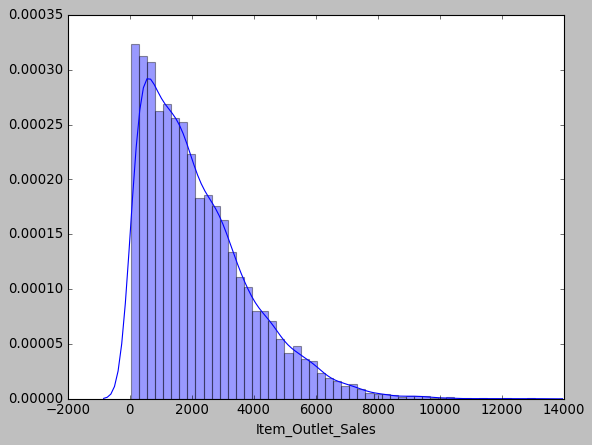

In [38]:
# let's check the distribution of the Item_Outlet_Sales
style.use('classic')
sns.distplot(df_train['Item_Outlet_Sales'] )
plt.show()

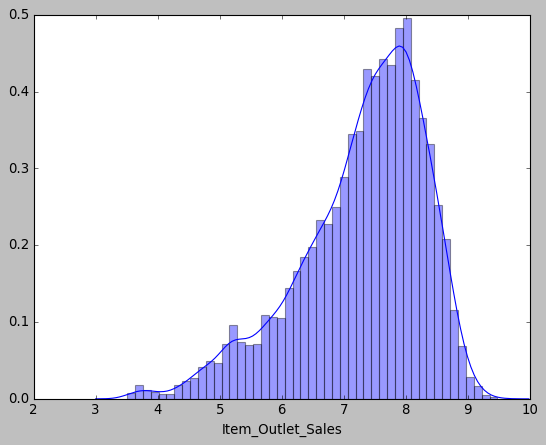

In [17]:
# let's make the distribution normal by taking "log" of numpy
style.use('classic')
sns.distplot(np.log(df_train['Item_Outlet_Sales']) )
plt.show()

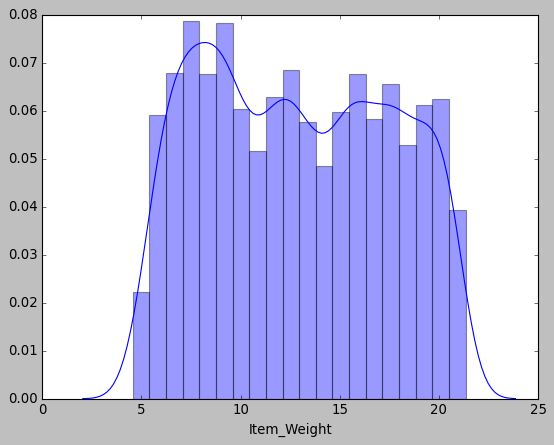

In [22]:
# distribution of weights columns
sns.distplot(df_train['Item_Weight'])
plt.show()

In [25]:
# check whether a unique item have same weight through out the dataset or different for that we will be use a unique 
# Item_Idetifier "FDA15"
df_train[df_train['Item_Identifier'] == "FDA15"]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392
6696,FDA15,NaN,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392
7543,FDA15,9.3,LF,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208


As we can see from the above that a unique Item have a Unique weight through out dataset

In [26]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

from above we can see that the items are divided into 5 different categories on the basis of "Item_Fat_Content" But in reality there is only two categories which is "Low Fat" and "Regualr"

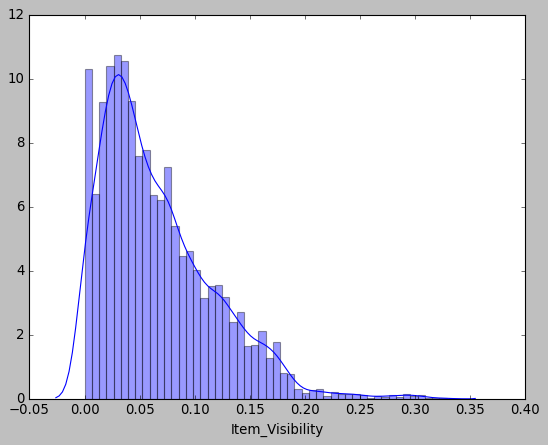

In [28]:
# distribution item visibility of the product 
sns.distplot(df_train['Item_Visibility'])
plt.show()

In [29]:
df_train.groupby('Outlet_Identifier')['Item_Visibility'].agg('sum')

Outlet_Identifier
OUT010    56.308832
OUT013    55.879859
OUT017    56.834646
OUT018    56.621454
OUT019    57.257041
OUT027    54.804764
OUT035    56.974873
OUT045    56.180780
OUT046    56.231875
OUT049    56.549156
Name: Item_Visibility, dtype: float64

In [30]:
df_train.groupby('Item_Identifier')['Item_Visibility'].agg('sum')

Item_Identifier
DRA12    0.191737
DRA24    0.336436
DRA59    1.077744
DRB01    0.246379
DRB13    0.040012
           ...   
NCZ30    0.174693
NCZ41    0.258114
NCZ42    0.045222
NCZ53    0.138877
NCZ54    0.562983
Name: Item_Visibility, Length: 1559, dtype: float64

In [33]:
df_train.groupby(['Outlet_Identifier','Item_Type'])['Item_Visibility'].agg('sum')

Outlet_Identifier  Item_Type    
OUT010             Baking Goods     5.410877
                   Breads           1.681009
                   Breakfast        1.034398
                   Canned           3.588867
                   Dairy            4.974601
                                      ...   
OUT049             Others           0.925926
                   Seafood          0.631597
                   Snack Foods      8.809802
                   Soft Drinks      2.818438
                   Starchy Foods    1.118573
Name: Item_Visibility, Length: 160, dtype: float64

In [34]:
df_train.groupby('Item_Type')['Item_Visibility'].agg('sum')

Item_Type
Baking Goods             44.821706
Breads                   16.630030
Breakfast                 9.429531
Canned                   44.215926
Dairy                    49.395349
Frozen Foods             56.192325
Fruits and Vegetables    84.407946
Hard Drinks              13.897707
Health and Hygiene       28.712309
Household                55.803305
Meat                     26.470620
Others                   10.180734
Seafood                   4.798469
Snack Foods              80.220267
Soft Drinks              28.467650
Starchy Foods             9.999407
Name: Item_Visibility, dtype: float64

In [31]:
df_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

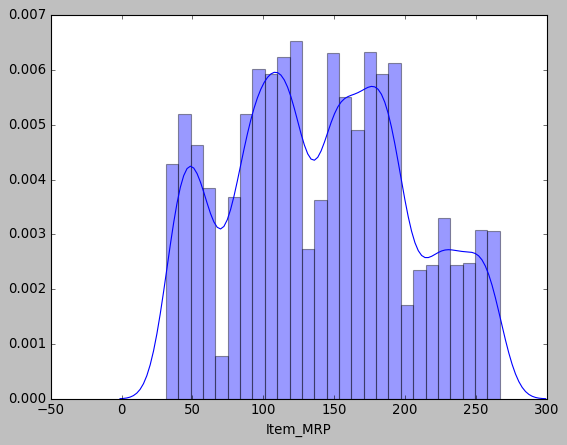

In [35]:
# distribution of Item_MRP
sns.distplot(df_train['Item_MRP'])
plt.show()

In [39]:
# how many unique year of outlet_establisment
df_train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [41]:
df_train.groupby('Outlet_Establishment_Year')['Outlet_Identifier'].value_counts()

Outlet_Establishment_Year  Outlet_Identifier
1985                       OUT027               935
                           OUT019               528
1987                       OUT013               932
1997                       OUT046               930
1998                       OUT010               555
1999                       OUT049               930
2002                       OUT045               929
2004                       OUT035               930
2007                       OUT017               926
2009                       OUT018               928
Name: Outlet_Identifier, dtype: int64

In [42]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [44]:
df_train.groupby('Outlet_Size')['Outlet_Identifier'].value_counts()

Outlet_Size  Outlet_Identifier
High         OUT013               932
Medium       OUT027               935
             OUT049               930
             OUT018               928
Small        OUT035               930
             OUT046               930
             OUT019               528
Name: Outlet_Identifier, dtype: int64

In [48]:
df_train.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [49]:
df_train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [50]:
df_train.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].agg(['min' , 'mean', 'max' , 'sum' , 'std'])

,min,mean,max,sum,std
Outlet_Location_Type,,,,,
Tier 1,33.9558,1876.909159,9779.9362,4.482059e+06,1561.649293
Tier 2,99.8700,2323.990559,9664.7528,6.472314e+06,1520.543543
Tier 3,33.2900,2279.627651,13086.9648,7.636753e+06,1912.451333


In [51]:
df_train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [52]:
df_train.groupby('Outlet_Type')['Item_Outlet_Sales'].agg(['min' , 'mean', 'max' , 'sum' , 'std'])

,min,mean,max,sum,std
Outlet_Type,,,,,
Grocery Store,33.2900,339.828500,1775.6886,3.680343e+05,260.851582
Supermarket Type1,73.2380,2316.181148,10256.6490,1.291734e+07,1515.965558
Supermarket Type2,69.2432,1995.498739,6768.5228,1.851823e+06,1375.932889
Supermarket Type3,241.6854,3694.038558,13086.9648,3.453926e+06,2127.760054


In [55]:
df = pd.read_csv('../dataset/train_folds.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Fold
0,FDZ25,15.70,Regular,0.027730,Canned,169.3790,OUT018,2009,Medium,Tier 3,Supermarket Type2,1528.0110,0
1,NCE07,8.18,Low Fat,0.013130,Household,142.6154,OUT046,1997,Small,Tier 1,Supermarket Type1,709.0770,0
2,NCS38,8.60,Low Fat,0.090559,Household,112.6176,OUT018,2009,Medium,Tier 3,Supermarket Type2,3091.9752,0
3,NCC19,6.57,Low Fat,0.096800,Household,192.3820,OUT013,1987,High,Tier 3,Supermarket Type1,4247.8040,0
4,FDR14,NaN,Low Fat,0.304737,Dairy,54.7298,OUT019,1985,Small,Tier 1,Grocery Store,107.8596,0


In [56]:
df.Fold.value_counts()

2    1705
1    1705
0    1705
4    1704
3    1704
Name: Fold, dtype: int64